# Analyse de la distribution des éruptions

On étudie les données "Old Faithful Geyser". 

Description: (From R manual):

Waiting time between eruptions and the duration of the eruption
for the Old Faithful geyser in Yellowstone National Park, Wyoming,
USA.

A data frame with 272 observations on 2 variables.
* eruptions : Eruption time in mins
* waiting : Waiting time to next eruption

## References

* Hardle, W. (1991) Smoothing Techniques with Implementation in S.
New York: Springer.

* Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
Old Faithful geyser. Applied Statistics 39, 357-365.




## Lecture des données

In [1]:
import openturns as ot

In [2]:
sample = ot.Sample.ImportFromCSVFile('faithful.csv', ",")
sample.setDescription(["Index", "Eruption", "Waiting"])

In [3]:
sample[:10]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=10 dimension=3 description=[Index,Eruption,Waiting] data=[[1,3.6,79],[2,1.8,54],[3,3.333,74],[4,2.283,62],[5,4.533,85],[6,2.883,55],[7,4.7,88],[8,3.6,85],[9,1.95,51],[10,4.35,85]]

In [4]:
waiting = sample[:,2]

## Histogramme

In [5]:
factory = ot.HistogramFactory()

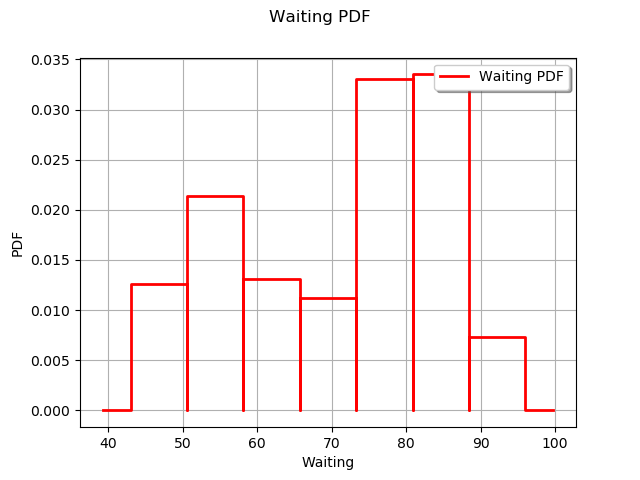

In [6]:
histogram = factory.build(waiting)
histogram.drawPDF()

In [7]:
bandwidth = factory.computeSilvermanBandwidth(waiting)
bandwidth

9.585431097147616

Configurons la largeur de bande pour fixer une valeur plus petite. 

In [8]:
bandwidth = 5.0

In [9]:
histogram = factory.build(waiting,bandwidth)

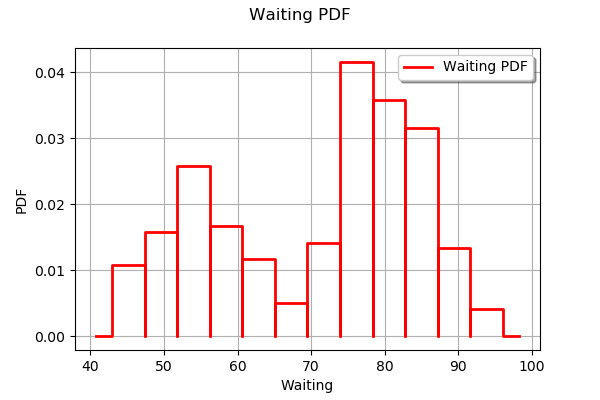

In [10]:
histogram.drawPDF()

On observe que les données sont représentées plus finement, avec deux modes clairement visibles autour de 55 et 80.

## Estimation à noyau

In [11]:
factory = ot.KernelSmoothing()

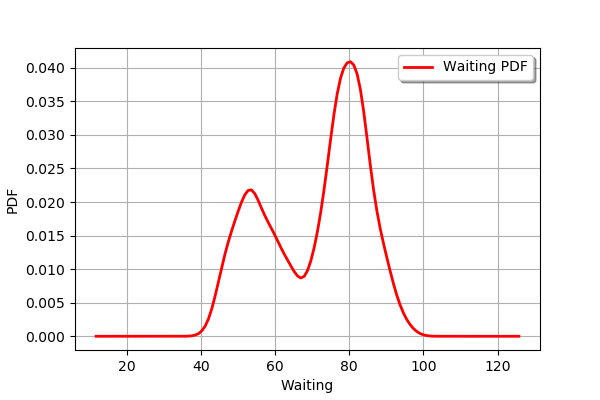

In [12]:
ks = factory.build(waiting)
graph = ks.drawPDF()
graph

In [13]:
bandwidth = factory.computeSilvermanBandwidth(waiting)
bandwidth

class=Point name=Unnamed dimension=1 values=[5.79819]

In [14]:
bandwidth2 = 2.0 * bandwidth
ks2 = factory.build(waiting, bandwidth2)
graph2 = ks2.drawPDF()
graph2.setColors(["orange"])

In [15]:
bandwidth3 = 0.1 * bandwidth
ks3 = factory.build(waiting, bandwidth3)
graph3 = ks3.drawPDF()
graph3.setColors(["cornflowerblue"])

In [16]:
bandwidth_list = [bandwidth[0], bandwidth2[0], bandwidth3[0]]

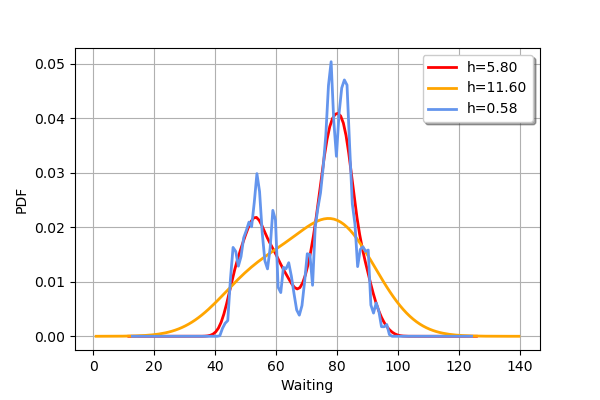

In [17]:
graph.add(graph2)
graph.add(graph3)
legend = ["h=%.2f" % (b) for b in bandwidth_list]
graph.setLegends(legend)
graph

On observe que 

* si la largeur de bande est trop petite, alors la distribution est trop piquée et 
* si la largeur de bande est trop grande, alors la distribution est trop lisse. 

En termes probabilistes, lorsque la largeur de bande $h$ diminue, alors 

* le biais diminue, 
* la variance augmente. 